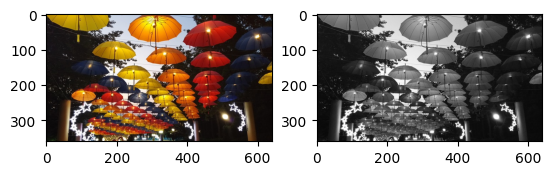

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

Dez = plt.imread('./images/umbrellas.jpg')
Dez = Dez.astype(np.float64) / 255
height, width, channels = Dez.shape
red = Dez[:,:,0]
green = Dez[:,:,1]
blue = Dez[:,:,2]
blackwhite_dez = red/3 + green/3 + blue/3
plt.subplot(1, 2, 1)
plt.imshow(Dez)
plt.subplot(1, 2, 2)
plt.imshow(blackwhite_dez, cmap='gray')
plt.show()

(360, 640)
(360, 640)


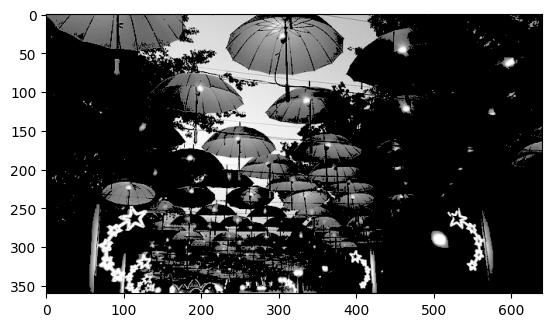

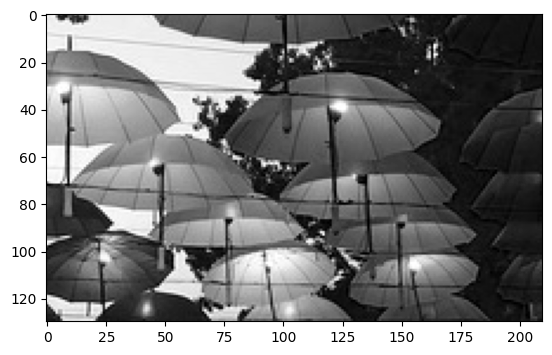

In [3]:
mask_dez = np.zeros_like(blackwhite_dez)
mask_dez[blackwhite_dez > 0.4] = 1
print(mask_dez.shape)
print(blackwhite_dez.shape)
plt.imshow(mask_dez * blackwhite_dez, cmap='gray')
plt.show()
cutout=Dez[130:260, 240:450, 1]
plt.imshow(cutout, cmap='gray')
plt.show()

## Why would you use different color maps?

Zato, ker bi lahko poudaril razne podrobnosti/značilnosti v podatkih, ki drugače morda ne bi bile vidne, če bi uporabili le sivinsko sliko.


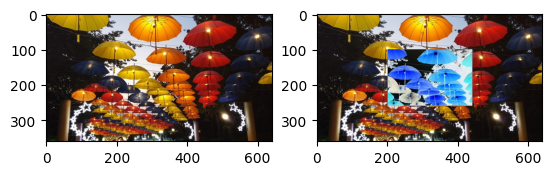

In [4]:
inverted_dez = np.copy(Dez)
inverted_dez[100:260, 200:440, 0] = 1 - Dez[100:260, 200:440, 0]
inverted_dez[100:260, 200:440, 1] = 1 - Dez[100:260, 200:440, 1]
inverted_dez[100:260, 200:440, 2] = 1 - Dez[100:260, 200:440, 2]
plt.subplot(1, 2, 1)
plt.imshow(Dez)
plt.subplot(1, 2, 2)
plt.imshow(inverted_dez)
plt.show()

##  How is inverting a grayscale value defined?

Če uporabljamo sivinsko lestivico od 0 do 255, potem je inverzna vrednost sivine enaka 255 - sivina.
Če uporabljamo sivinsko lestvico od 0 do 1, potem je inverzna vrednost sivine enaka 1 - sivina.

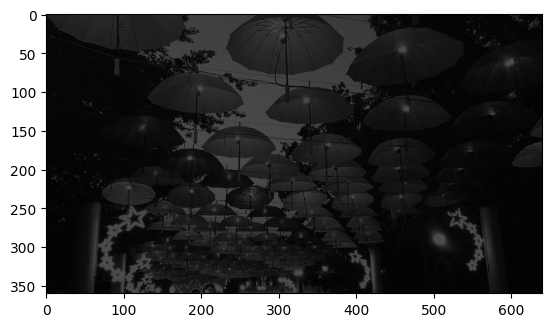

In [5]:
blackwhite_dez_1 = np.copy(blackwhite_dez)
blackwhite_dez_1 = blackwhite_dez_1 * 0.3
plt.imshow(blackwhite_dez_1, cmap='gray', vmin=0, vmax=1)
plt.show()

In [6]:
def pretvori_crnobelo(slika):
    red = slika[:,:,0]
    green = slika[:,:,1]
    blue = slika[:,:,2]
    
    blackwhite_slika = (red + green + blue) / 3
    
    return blackwhite_slika

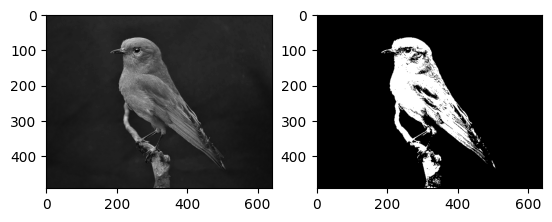

In [7]:
ptica = plt.imread('./images/bird.jpg')
ptica = ptica.astype(np.float64) / 255
blackwhite_ptica = pretvori_crnobelo(ptica)
plt.subplot(1, 2, 1)
plt.imshow(blackwhite_ptica, cmap='gray')

# 1. nacin

def maskiraj_sliko(slika, meja):
    mask = np.zeros_like(slika)
    mask[slika >= meja] = 1
    return mask

meja = 0.3 # mislim, da je 0.2 boljse
mask_ptica = maskiraj_sliko(blackwhite_ptica, meja)
plt.subplot(1, 2, 2)
plt.imshow(mask_ptica, cmap='gray')
plt.show()

#2. nacin
mask_ptica = np.where(blackwhite_ptica >= meja, 1, 0)

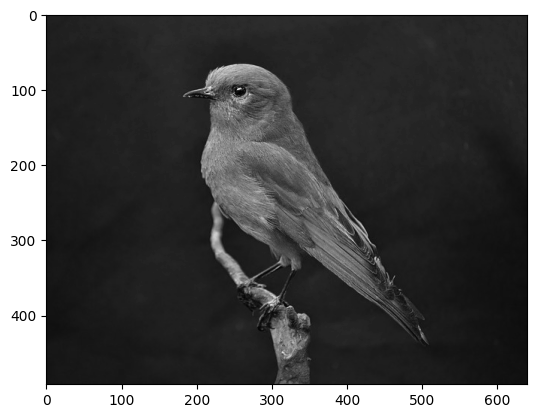

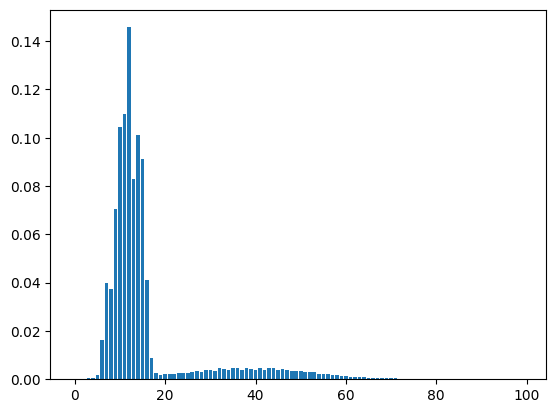

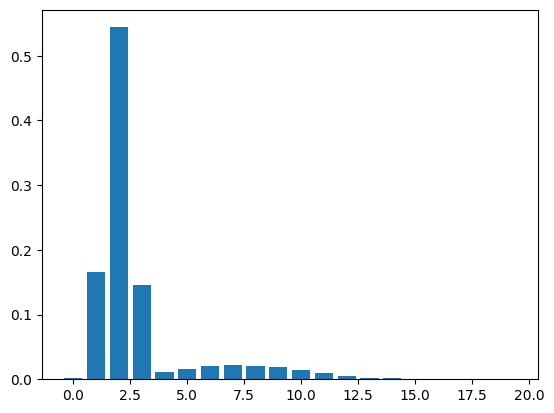

In [8]:
def myhist(blackwhite, bins):
    visina, sirina = blackwhite.shape
    hist = np.array([0] * bins)
    #print(hist)
    for i in range(bins):
        hist[i] = np.sum((blackwhite >= i / bins) & (blackwhite < (i + 1) / bins))
        #hist[i] = hist[i].astype(np.float64) / (visina * sirina)
        #print(i/bins, (i+1)/bins, hist[i])
    
    hist[bins - 1] += np.sum(blackwhite == 1)
    #print(hist)
    hist = hist / (visina * sirina)
    return hist

histogram = myhist(blackwhite_ptica, 100)
plt.imshow(blackwhite_ptica, cmap='gray')
plt.show()
plt.bar(range(len(histogram)), histogram)
plt.show()
histogram = myhist(blackwhite_ptica, 20)
#print(histogram)
plt.bar(range(len(histogram)), histogram)
#print(range(len(histogram)))
plt.show()

## The histograms are usually normalized by dividing the result by the sum of all cells. Why is that?

Normalizacija histogramov nam omogoča primerjavo histogramov različnih slik, saj so vse vrednosti v histogramu omejene na interval od 0 do 1.

Bin size 1 :  0.01
Bin size 2 :  0.00992156862745098
0.00012068089430894309 0.0001365599593495935
0.00021913109756097561 0.00022548272357723577
0.0002032520325203252 0.00022548272357723577
0.0004128556910569106 0.00039697662601626015
0.0005144817073170732 0.00048589939024390244
0.0018832571138211382 0.0019721798780487805
0.01607278963414634 0.025597052845528455
0.039656377032520326 0.03004319105691057
0.037182418699186995 0.044661458333333334
0.0704490599593496 0.06297002032520325
0.10443661077235772 0.10443661077235772
0.10988630589430895 0.11352261178861789
0.14571900406504065 0.1420826981707317
0.08298081808943089 0.08298081808943089
0.10096544715447155 0.10096544715447155
0.09128556910569105 0.09128556910569105
0.04110772357723577 0.04110772357723577
0.008755716463414635 0.008755716463414635
0.0025755843495934958 0.0025755843495934958
0.0019023119918699187 0.0017339939024390244
0.0020198170731707318 0.002188135162601626
0.0022421239837398374 0.0019658282520325205
0.0021754319105691

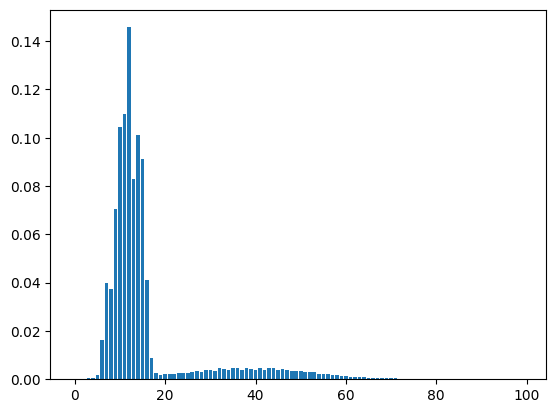

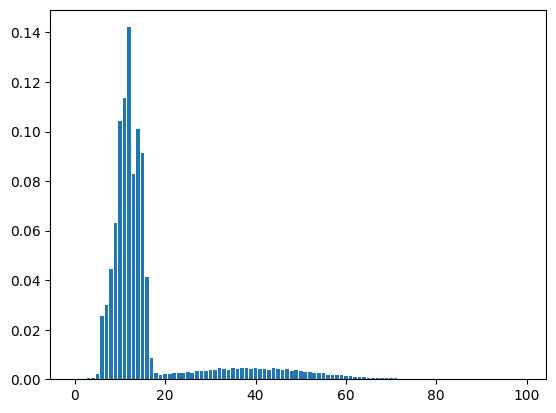

Bin size 1 :  0.05
Bin size 2 :  0.0496078431372549
0.0014704014227642276 0.0014704014227642276
0.1652439024390244 0.1652439024390244
0.5439881859756097 0.5439881859756097
0.14562690548780488 0.14545858739837397
0.011820376016260162 0.011623475609756097
0.016164888211382115 0.0159838668699187
0.020204522357723576 0.020182291666666668
0.022036966463414635 0.021614583333333333
0.021182672764227643 0.021061991869918698
0.018902439024390243 0.019108866869918698
0.014367378048780488 0.014624618902439025
0.00901295731707317 0.009336890243902439
0.005001905487804878 0.005055894308943089
0.002502540650406504 0.0026136941056910568
0.0013783028455284553 0.001444994918699187
0.0006383384146341464 0.0006986788617886179
0.00029535060975609755 0.0003175813008130081
0.00011432926829268293 0.00011115345528455284
2.8582317073170733e-05 4.1285569105691055e-05
1.9054878048780488e-05 1.9054878048780488e-05


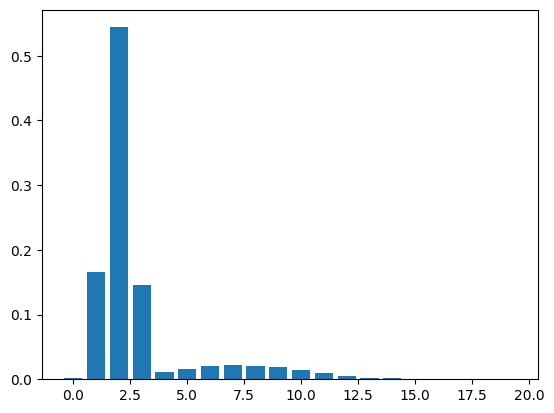

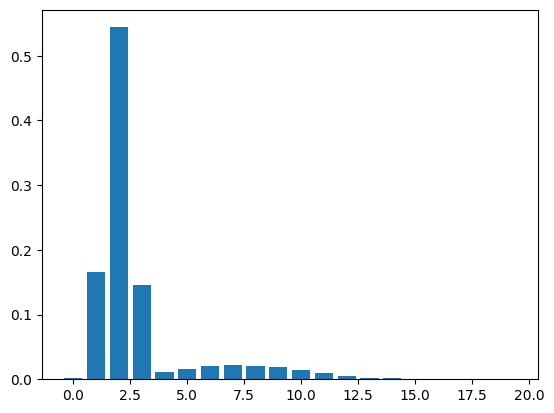

In [9]:
def myhist2(blackwhite, bins):
    visina, sirina = blackwhite.shape
    hist = np.array([0] * bins)
    minimalna = np.min(blackwhite)
    maksimalna = np.max(blackwhite)
    razlika = maksimalna - minimalna
    print("Bin size 2 : ", razlika / bins)
    for i in range(bins):
        hist[i] = np.sum((blackwhite >= (i*razlika / bins + minimalna)) & (blackwhite < ((i + 1) * razlika / bins + minimalna)))
    
    hist[bins - 1] += np.sum(blackwhite == maksimalna)
    hist = hist / (visina * sirina)
    return hist

histogram1 = myhist(blackwhite_ptica, 100)
print("Bin size 1 : ", 1/100)
histogram2 = myhist2(blackwhite_ptica, 100)
for i in range(100):
    print(histogram1[i], histogram2[i])
plt.bar(range(len(histogram1)), histogram1)
plt.show()
plt.bar(range(len(histogram2)), histogram2)
plt.show()


histogram1 = myhist(blackwhite_ptica, 20)
print("Bin size 1 : ", 1/20)
histogram2 = myhist2(blackwhite_ptica, 20)
for i in range(20):
    print(histogram1[i], histogram2[i])
plt.bar(range(len(histogram1)), histogram1)
plt.show()
plt.bar(range(len(histogram2)), histogram2)
plt.show()


Bin size 2 :  0.005437908496732025
Bin size 2 :  0.008901960784313726
Bin size 2 :  0.01
Bin size 2 :  0.02718954248366013
Bin size 2 :  0.04450980392156863
Bin size 2 :  0.05


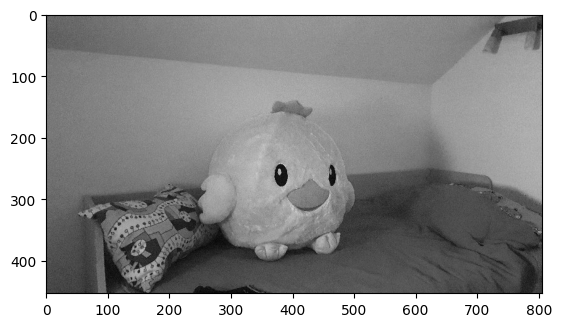

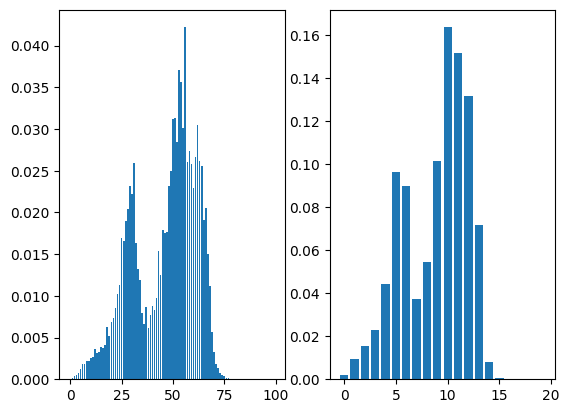

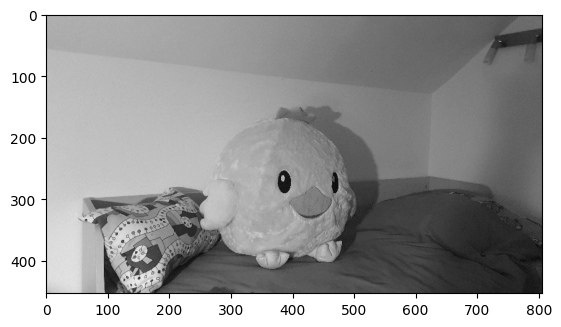

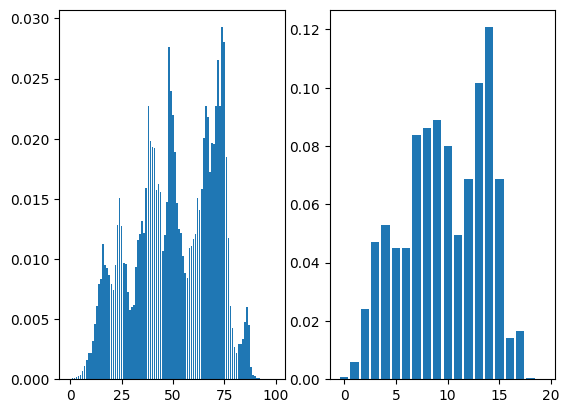

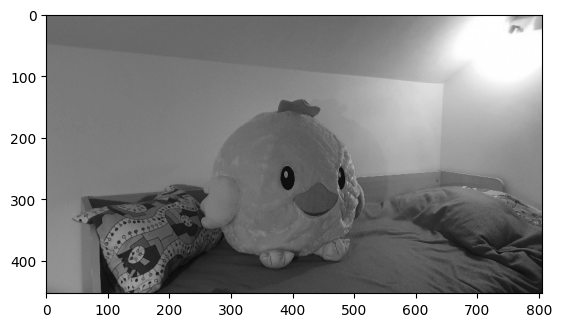

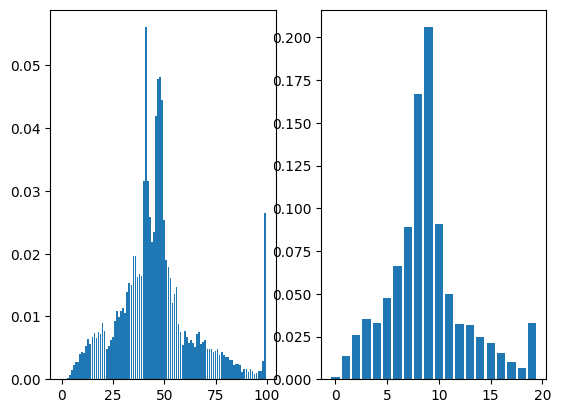

In [10]:
slika1 = plt.imread('./images/soba1.jpg').astype(np.float64) / 255
slika2 = plt.imread('./images/soba2.jpg').astype(np.float64) / 255
slika3 = plt.imread('./images/soba3.jpg').astype(np.float64) / 255

slika1_bw = pretvori_crnobelo(slika1)
slika2_bw = pretvori_crnobelo(slika2)
slika3_bw = pretvori_crnobelo(slika3)

histogram1 = myhist2(slika1_bw, 100)
histogram2 = myhist2(slika2_bw, 100)
histogram3 = myhist2(slika3_bw, 100)

histogram11 = myhist2(slika1_bw, 20)
histogram22 = myhist2(slika2_bw, 20)
histogram33 = myhist2(slika3_bw, 20)


plt.imshow(slika1_bw, cmap='gray')
plt.show()
plt.subplot(1, 2, 1)
plt.bar(range(len(histogram1)), histogram1)
plt.subplot(1, 2, 2)
plt.bar(range(len(histogram11)), histogram11)
plt.show()

plt.imshow(slika2_bw, cmap='gray')
plt.show()
plt.subplot(1, 2, 1)
plt.bar(range(len(histogram2)), histogram2)
plt.subplot(1, 2, 2)
plt.bar(range(len(histogram22)), histogram22)
plt.show()

plt.imshow(slika3_bw, cmap='gray')
plt.show()
plt.subplot(1, 2, 1)
plt.bar(range(len(histogram3)), histogram3)
plt.subplot(1, 2, 2)
plt.bar(range(len(histogram33)), histogram33)
plt.show()



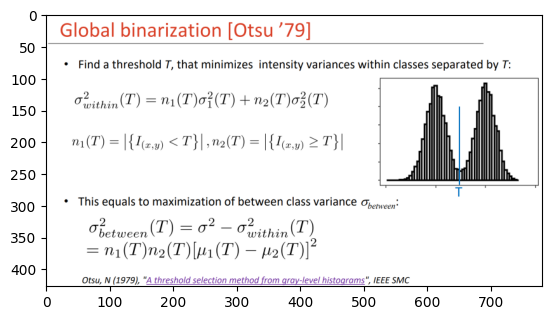

In [11]:
otsu = plt.imread('./images/otsu.png')
plt.imshow(otsu)
plt.show()

73 100 191


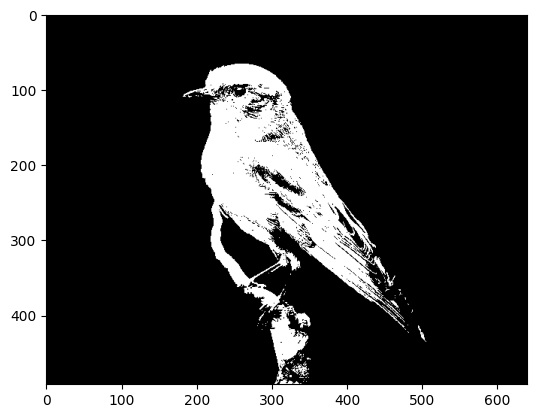

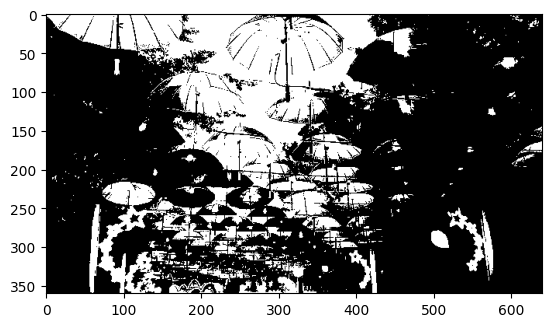

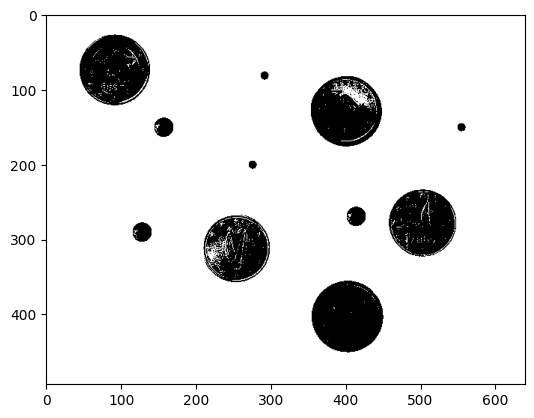

In [12]:
def otsu_threshold(blackwhite):
    visina, sirina = blackwhite.shape
    histogram = myhist(blackwhite, 256)
    max_sigma_between = 0
    threshold = 0
    for i in range(1, 256):
        n1 = np.sum(histogram[:i])
        n2 = np.sum(histogram[i:])

        if n1 == 0 or n2 == 0:
            continue

        o1 = np.sum(histogram[:i] * np.arange(i)) / n1
        o2 = np.sum(histogram[i:] * np.arange(i, 256)) / n2
        
        sigma_between = n1 * n2 * (o1 - o2) ** 2
        if sigma_between > max_sigma_between:
            max_sigma_between = sigma_between
            threshold = i
    return threshold


slika_ptica = plt.imread('./images/bird.jpg').astype(np.float64) / 255
slika_dezniki = plt.imread('./images/umbrellas.jpg').astype(np.float64) / 255
slika_kovanci = plt.imread('./images/coins.jpg').astype(np.float64) / 255

slika_ptica_bw = pretvori_crnobelo(slika_ptica)
slika_dezniki_bw = pretvori_crnobelo(slika_dezniki)
slika_kovanci_bw = pretvori_crnobelo(slika_kovanci)

threshold_ptica = otsu_threshold(slika_ptica_bw)
threshold_dezniki = otsu_threshold(slika_dezniki_bw)
threshold_kovanci = otsu_threshold(slika_kovanci_bw)

print(threshold_ptica, threshold_dezniki, threshold_kovanci)

maskirana_ptica = maskiraj_sliko(slika_ptica_bw, threshold_ptica / 255)
maskirani_dezniki = maskiraj_sliko(slika_dezniki_bw, threshold_dezniki / 255)
maskirani_kovanci = maskiraj_sliko(slika_kovanci_bw, threshold_kovanci / 255)

plt.imshow(maskirana_ptica, cmap='gray')
plt.show()
plt.imshow(maskirani_dezniki, cmap='gray')
plt.show()
plt.imshow(maskirani_kovanci, cmap='gray')
plt.show()

2


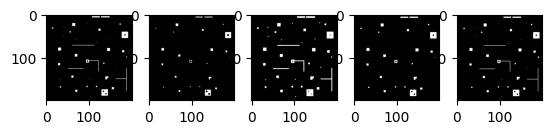

4


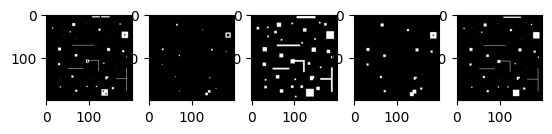

6


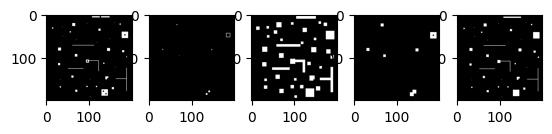

8


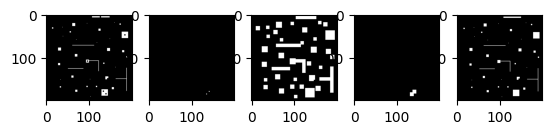

In [206]:
slika_mask = plt.imread('./images/mask.png')

for n in range(2, 10, 2):
    SE = np.ones((n, n))
    slika_mask_eroded = cv2.erode(slika_mask, SE)
    slika_mask_dilated = cv2.dilate(slika_mask, SE)
    slika_mask_opened = cv2.morphologyEx(slika_mask, cv2.MORPH_OPEN, SE)
    slika_mask_closed= cv2.morphologyEx(slika_mask, cv2.MORPH_CLOSE, SE)

    print(n)
    plt.subplot(1, 5, 1)
    plt.imshow(slika_mask, cmap='gray')
    plt.subplot(1, 5, 2)
    plt.imshow(slika_mask_eroded, cmap='gray')
    plt.subplot(1, 5, 3)
    plt.imshow(slika_mask_dilated, cmap='gray')
    plt.subplot(1, 5, 4)
    plt.imshow(slika_mask_opened, cmap='gray')
    plt.subplot(1, 5, 5)
    plt.imshow(slika_mask_closed, cmap='gray')
    plt.show()

## Based on the results, which order of erosion and dilation operations produces opening and which closing?

Zaporedje operacij erozije in dilacije je odvisno od tega, kaj želimo doseči. Če želimo odstraniti majhne objekte iz slike, potem najprej uporabimo erozijo in nato dilacijo (odpiranje). Če želimo zapolniti majhne luknje v objektih, potem najprej uporabimo dilacijo in nato erozijo (zapiranje).

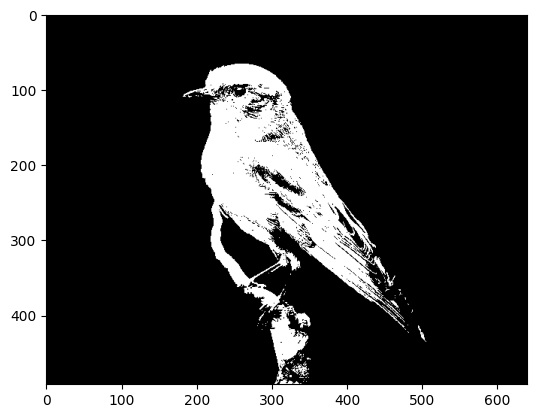

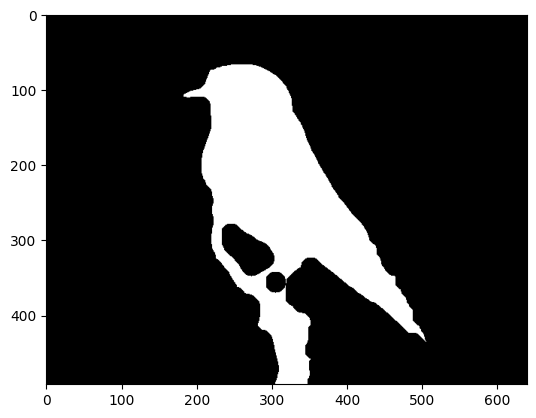

In [207]:
slika_ptica = plt.imread('./images/bird.jpg').astype(np.float64) / 255
slika_ptica_bw = pretvori_crnobelo(slika_ptica)
threshold_ptica = otsu_threshold(slika_ptica_bw)
maskirana_ptica = maskiraj_sliko(slika_ptica_bw, threshold_ptica / 255)

n = 26
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (n, n))
maskirana_ptica_eroded = cv2.erode(maskirana_ptica, SE)
maskirana_ptica_dilated = cv2.dilate(maskirana_ptica, SE)
maskirana_ptica_opened = cv2.morphologyEx(maskirana_ptica, cv2.MORPH_OPEN, SE)
maskirana_ptica_closed = cv2.morphologyEx(maskirana_ptica, cv2.MORPH_CLOSE, SE)

plt.imshow(maskirana_ptica, cmap='gray')
plt.show()
#plt.subplot(1, 5, 2)
#plt.imshow(maskirana_ptica_eroded, cmap='gray')

#plt.imshow(maskirana_ptica_dilated, cmap='gray')
#plt.show()
#plt.subplot(1, 5, 4)
#plt.imshow(maskirana_ptica_opened, cmap='gray')

plt.imshow(maskirana_ptica_closed, cmap='gray')
plt.show()


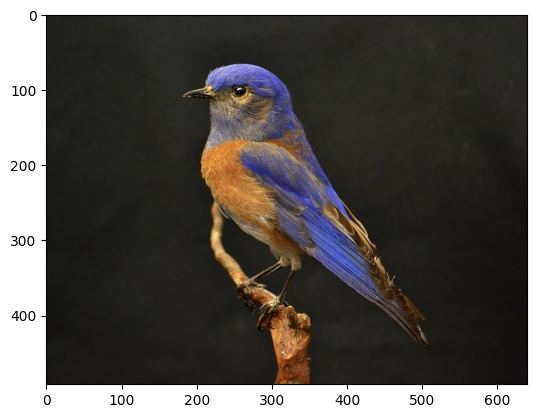

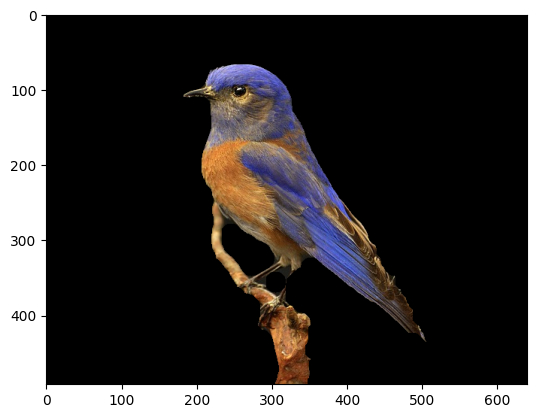

In [208]:
def immask(slika, mask):
    return slika * mask

slika_ptica = plt.imread('./images/bird.jpg').astype(np.float64) / 255
slika_ptica_bw = pretvori_crnobelo(slika_ptica)
threshold_ptica = otsu_threshold(slika_ptica_bw)
maskirana_ptica = maskiraj_sliko(slika_ptica_bw, threshold_ptica / 255)

n = 26
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (n, n))
maskirana_ptica_closed = cv2.morphologyEx(maskirana_ptica, cv2.MORPH_CLOSE, SE)
maskirana_ptica_closed = np.expand_dims(maskirana_ptica_closed, axis=2)

slika_ptica_maskirana = immask(slika_ptica, maskirana_ptica_closed)

plt.imshow(slika_ptica)
plt.show()
plt.imshow(slika_ptica_maskirana)
plt.show()

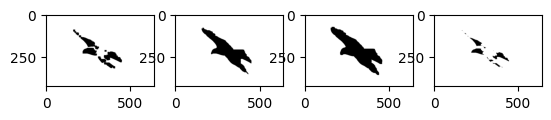

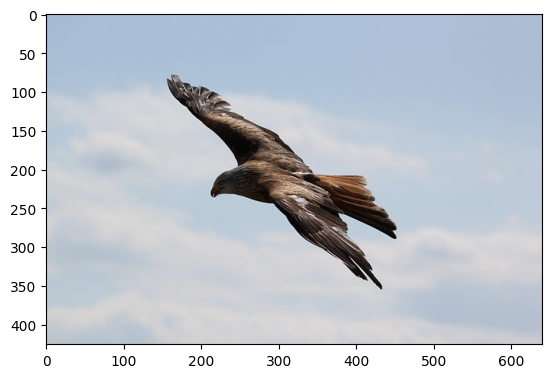

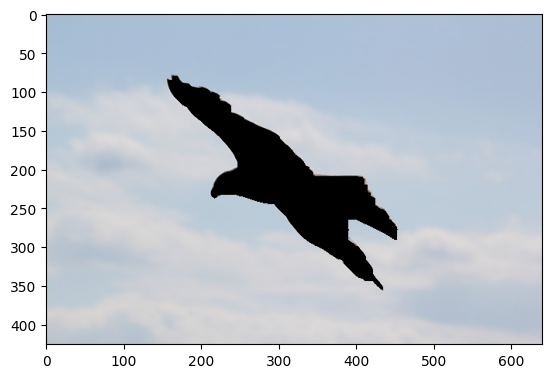

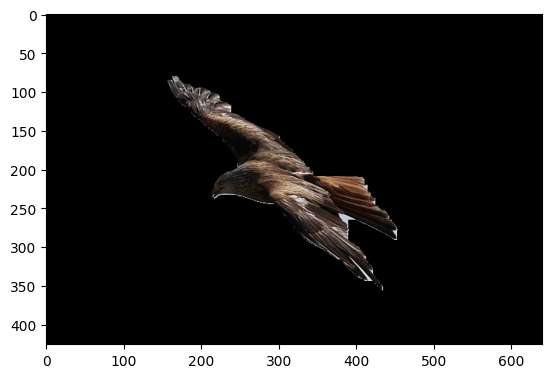

In [209]:
slika_orel = plt.imread('./images/eagle.jpg').astype(np.float64) / 255
slika_orel_bw = pretvori_crnobelo(slika_orel)
threshold_orel = otsu_threshold(slika_orel_bw)
maskirana_orel = maskiraj_sliko(slika_orel_bw, threshold_orel / 255)

n = 10
SE = cv2.getStructuringElement(cv2.MORPH_RECT, (n, n))
maskirana_orel_closed = cv2.morphologyEx(maskirana_orel, cv2.MORPH_CLOSE, SE)
maskirana_orel_opened = cv2.morphologyEx(maskirana_orel, cv2.MORPH_OPEN, SE) # najboljse
maskirana_orel_eroded = cv2.erode(maskirana_orel, SE) 
maskirana_orel_dilated = cv2.dilate(maskirana_orel, SE)

maskirana_orel_closed = np.expand_dims(maskirana_orel_closed, axis=2)
maskirana_orel_opened = np.expand_dims(maskirana_orel_opened, axis=2)
maskirana_orel_eroded = np.expand_dims(maskirana_orel_eroded, axis=2)
maskirana_orel_dilated = np.expand_dims(maskirana_orel_dilated, axis=2)

plt.subplot(1,4,1)
plt.imshow(maskirana_orel_closed, cmap='gray')
plt.subplot(1,4,2)
plt.imshow(maskirana_orel_opened, cmap='gray')
plt.subplot(1,4,3)
plt.imshow(maskirana_orel_eroded, cmap='gray')
plt.subplot(1,4,4)
plt.imshow(maskirana_orel_dilated, cmap='gray')
plt.show()

slika_orel_maskirana = immask(slika_orel, maskirana_orel_opened)
slika_orel_maskirana_inverted = immask(slika_orel, 1 - maskirana_orel_opened)

plt.imshow(slika_orel)
plt.show()
plt.imshow(slika_orel_maskirana)
plt.show()
plt.imshow(slika_orel_maskirana_inverted)
plt.show()

## Why is the background included in the mask and not the object? How would you fix that in general? (just inverting the mask if necessary doesn’t count)

Ozadje je lahko vključeno v masko namesto objekta, če ima ozadje večjo svetlost kot objekt (orel je temnejši od neba). Ena možnost bi bila, da bi uporabili površino objekta in primerjali z ozadjem (manjša površina - objekt, večja površina - ozadje), vendar to ni vedno pravilno, saj lahko objekt zaseda večji del slike kot ozadje. Druga možnost je, da bi uporabnik vnaprej določil, kateri del slike je ozadje in kateri objekt. Na internetu sem našel tudi še en kup možnosti, ki pa so precej bolj zapletene (npr. Gradient-based segmentation, Clustering-based segmentation, ...).

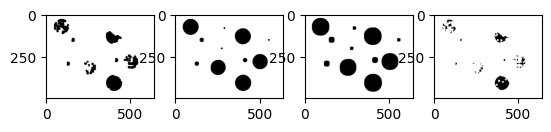

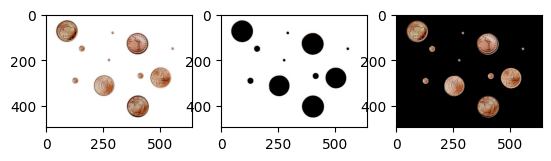

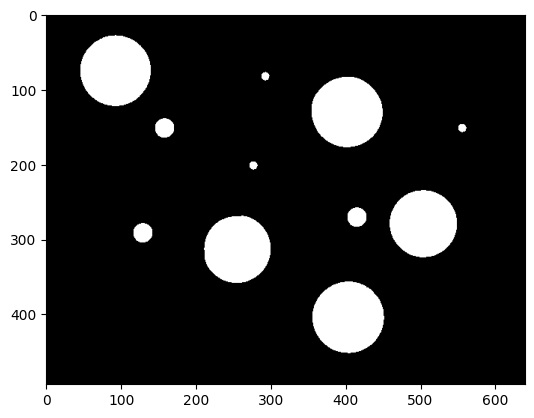

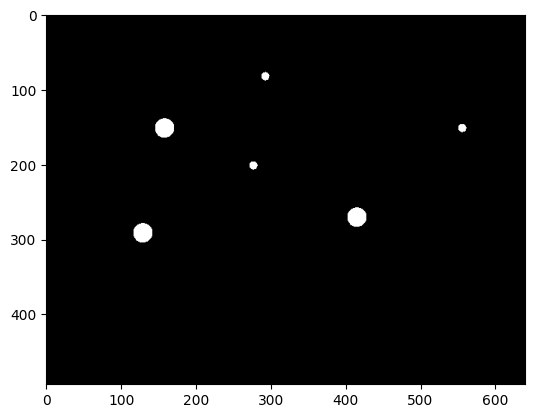

In [210]:
slika_kovanci = plt.imread('./images/coins.jpg').astype(np.float64) / 255
slika_kovanci_bw = pretvori_crnobelo(slika_kovanci)
threshold_kovanci = otsu_threshold(slika_kovanci_bw)
maskirani_kovanci = maskiraj_sliko(slika_kovanci_bw, threshold_kovanci / 255)

n = 10
SE = cv2.getStructuringElement(cv2.MORPH_RECT, (n, n))
maskirani_kovanci_closed = cv2.morphologyEx(maskirani_kovanci, cv2.MORPH_CLOSE, SE)
maskirani_kovanci_opened = cv2.morphologyEx(maskirani_kovanci, cv2.MORPH_OPEN, SE) # najboljse
maskirani_kovanci_eroded = cv2.erode(maskirani_kovanci, SE)
maskirani_kovanci_dilated = cv2.dilate(maskirani_kovanci, SE)

maskirani_kovanci_closed = np.expand_dims(maskirani_kovanci_closed, axis=2)
maskirani_kovanci_opened = np.expand_dims(maskirani_kovanci_opened, axis=2)
maskirani_kovanci_eroded = np.expand_dims(maskirani_kovanci_eroded, axis=2)
maskirani_kovanci_dilated = np.expand_dims(maskirani_kovanci_dilated, axis=2)

plt.subplot(1,4,1)
plt.imshow(maskirani_kovanci_closed, cmap='gray')
plt.subplot(1,4,2)
plt.imshow(maskirani_kovanci_opened, cmap='gray')
plt.subplot(1,4,3)
plt.imshow(maskirani_kovanci_eroded, cmap='gray')
plt.subplot(1,4,4)
plt.imshow(maskirani_kovanci_dilated, cmap='gray')
plt.show()

slika_kovanci_maskirana = immask(slika_kovanci, maskirani_kovanci_opened)
slika_kovanci_maskirana_inverted = immask(slika_kovanci, 1 - maskirani_kovanci_opened)

plt.subplot(1, 3, 1)
plt.imshow(slika_kovanci)
plt.subplot(1, 3, 2)
plt.imshow(slika_kovanci_maskirana)
plt.subplot(1, 3, 3)
plt.imshow(slika_kovanci_maskirana_inverted)
plt.show()

slika_kovanci_maskirana_inverted_bw = np.where(pretvori_crnobelo(slika_kovanci_maskirana_inverted) > 0, 1, 0)
plt.imshow(slika_kovanci_maskirana_inverted_bw, cmap='gray')
plt.show()

n, labels, stats, centroids = cv2.connectedComponentsWithStats(slika_kovanci_maskirana_inverted_bw.astype(np.uint8), 4, cv2.CV_32S)
#print(n, labels, stats, centroids)

for i in range(1, n):
    if stats[i, cv2.CC_STAT_AREA] > 700:
        slika_kovanci_maskirana_inverted_bw[labels == i] = 0

plt.imshow(slika_kovanci_maskirana_inverted_bw, cmap='gray')
